# Histogram vs Kernel

## Fig 6.1

In [1]:
"""
Great Wall KDE
--------------
Figure 6.3

Kernel density estimation for galaxies within the SDSS "Great Wall." The
top-left panel shows points that are galaxies, projected by their spatial
locations (right ascension and distance determined from redshift measurement)
onto the equatorial plane (declination ~ 0 degrees). The remaining panels show
estimates of the density of these points using kernel density estimation with
a Gaussian kernel (upper right), a top-hat kernel (lower left), and an
exponential kernel (lower right). Compare also to figure 6.4.
"""

'\nGreat Wall KDE\n--------------\nFigure 6.3\n\nKernel density estimation for galaxies within the SDSS "Great Wall." The\ntop-left panel shows points that are galaxies, projected by their spatial\nlocations (right ascension and distance determined from redshift measurement)\nonto the equatorial plane (declination ~ 0 degrees). The remaining panels show\nestimates of the density of these points using kernel density estimation with\na Gaussian kernel (upper right), a top-hat kernel (lower left), and an\nexponential kernel (lower right). Compare also to figure 6.4.\n'

In [3]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.neighbors import KernelDensity

from astroML.datasets import fetch_great_wall


In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [5]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [7]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Fetch the great wall data

In [8]:
#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

# Create  the grid on which to evaluate the results

In [9]:
#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

# Evaluate for several models

In [10]:
#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kernels = ['gaussian', 'tophat', 'exponential']
dens = []

kde1 = KernelDensity(bandwidth=5, kernel='gaussian')
log_dens1 = kde1.fit(X).score_samples(Xgrid)
dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

kde2 = KernelDensity(bandwidth=5, kernel='tophat')
log_dens2 = kde2.fit(X).score_samples(Xgrid)
dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

kde3 = KernelDensity(bandwidth=5, kernel='exponential')
log_dens3 = kde3.fit(X).score_samples(Xgrid)
dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))


<ipython-input-10-89e972d6db52>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),


In [11]:
Xgrid.shape

(6250, 2)

In [12]:
thegrid=np.meshgrid(np.linspace(xmin, xmax, Nx),np.linspace(ymin, ymax, Ny))

Text(0, 0.5, 'Y')

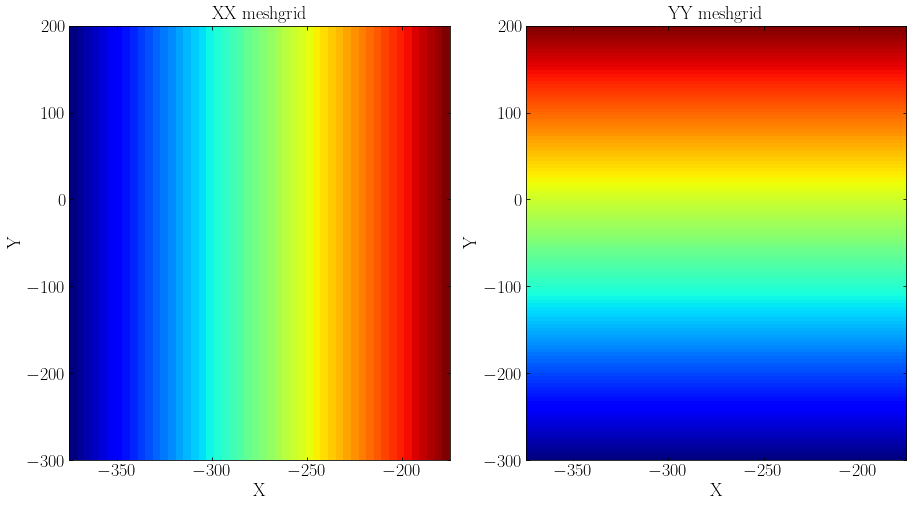

In [13]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121)
ax.imshow(thegrid[0],origin="lower",aspect="auto",cmap="jet",extent=(xmin,xmax,ymin,ymax))
ax.set_title("XX meshgrid")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax = fig.add_subplot(122)
ax.imshow(thegrid[1],origin="lower",aspect="auto",cmap="jet",extent=(xmin,xmax,ymin,ymax))
ax.set_title("YY meshgrid")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Plot the results

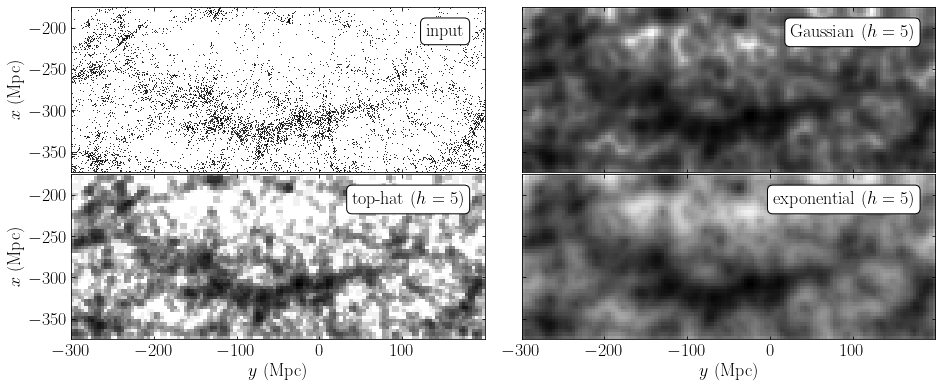

In [14]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(15, 6.6))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens1.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=5)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens2.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=5)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens3.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=5)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')

plt.show()
